# Biomedical Data Analysis - Lab 4

Group members:

- Enrico Maria Marinelli
- Francesco Pio Capoccello
- Juras LukaŠevičius

### Libraries used in practical session:

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neural_network as nn
from sklearn import metrics
from sklearn.model_selection import train_test_split
import json
import pickle
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import HTML
from scipy.sparse import csr_matrix
from scipy.stats import pearsonr
import regex as re
from scipy.sparse import csr_matrix
from scipy.stats import pearsonr
import regex as re

## Block I - Data loading and basic description

We load the dataset using the pandas’ load_csv function, remember to specify semicolon (;) as
the separator

In [90]:
df=pd.read_csv("Data/inadvance_synth.csv",sep=";")

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38416 entries, 0 to 38415
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           38416 non-null  int64  
 1   age                  38416 non-null  int64  
 2   barthel              10218 non-null  float64
 3   charlson             38339 non-null  float64
 4   codidiagingreso      27038 non-null  object 
 5   codservicioreal      38416 non-null  object 
 6   creatinina           30465 non-null  float64
 7   drg                  34776 non-null  float64
 8   estancias            38416 non-null  float64
 9   glucosa              29188 non-null  float64
 10  hematocrito          30114 non-null  float64
 11  leucocitos           30114 non-null  float64
 12  metastatic_tumor     38339 non-null  float64
 13  num_grupoact3_HOSP   17415 non-null  float64
 14  numurgenciasprevias  37864 non-null  float64
 15  potasio              29770 non-null 

### 1. What is the size of the dataframe?

In [92]:
# Drop the "Unnamed" column
df = df.iloc[:,1:]

In [93]:
df.shape

(38416, 21)

### 2. What is the mean age?

In [94]:
mean = df.age.mean()
print(mean)

79.4033215326947


### 3. What is the age standard deviation (std)?

In [95]:
std=df.age.std()
print(std)

8.361737254116035


### 4. Which is the variable with the most amount of missing values? Can you list the name of the variables, sorting them by number of missing values?

In [96]:
def nullvalues(df=df):
    nullvalues = df.isnull().sum()
    features_sorted = nullvalues.sort_values(ascending=False)
    return features_sorted
print(nullvalues())

barthel                28198
num_grupoact3_HOSP     21001
proteina_c_reactiva    18175
urea                   14260
codidiagingreso        11378
glucosa                 9228
potasio                 8646
rdw_sd                  8334
rdw_cv                  8334
hematocrito             8302
leucocitos              8302
sodio                   8142
creatinina              7951
drg                     3640
numurgenciasprevias      552
metastatic_tumor          77
charlson                  77
age                        0
estancias                  0
codservicioreal            0
label                      0
dtype: int64


### 5. Name which are the categorical variables.

In [97]:
categorical_variables = df.select_dtypes(include=['object'])
categorical_variables_names = categorical_variables.columns.tolist()
print(categorical_variables_names)

['codidiagingreso', 'codservicioreal']


In [98]:
def find_cat(x):
    if isinstance(x,str):
        pattern = r'[0-9]+.?[0-9]*'
        test = not (re.match(pattern, x))
        # print(f"{x}: {test}")  # Add this line for debugging
        return test
    # print(f"{x}: False")  # Add this line for debugging
    return False

In [99]:
def categorical_enumeration(cat,categorical_variables=categorical_variables, printing=True):
  
  if printing:
    print('Evaluation of categorical variable "' + cat + '"')

  # categories = categorical_variables[categorical_variables[cat].apply(find_cat)]
  # if cat == categorical_variables_names[0]:
  #   categories = categorical_variables[categorical_variables[cat].apply(find_cat)]
  # else:
  categories = categorical_variables[cat].astype(str)
  

  unique, count = np.unique(categories, return_counts=True)


  if printing:
    print('Number of categories for "'+ cat + '":', len(unique))
  
  combined = np.column_stack((unique, count))
  sorted_combined = combined[combined[:, 1].argsort()[::-1]]
  
  if printing:
    for i in sorted_combined:
      if isinstance(i[0],float):
        print("Class %f has %d samples" % (i[0],i[1]))
      else:
        print("Class " + str(i[0]) + " has %d samples" % i[1])
  
  return np.array(sorted_combined)

In [100]:
categories_codidiagingreso = categorical_enumeration(categorical_variables_names[0])

Evaluation of categorical variable "codidiagingreso"
Number of categories for "codidiagingreso": 2039
Class nan has 11378 samples
Class 401.9 has 2734 samples
Class 518.81 has 643 samples
Class 486 has 533 samples
Class 250.00 has 532 samples
Class 414.9 has 511 samples
Class 427.31 has 450 samples
Class 466.0 has 437 samples
Class 599.0 has 417 samples
Class 428.0 has 391 samples
Class 428.9 has 391 samples
Class 491.21 has 322 samples
Class 414.01 has 284 samples
Class 578.9 has 265 samples
Class V14.8 has 245 samples
Class 560.9 has 231 samples
Class 577.0 has 206 samples
Class 518.84 has 204 samples
Class 272.4 has 201 samples
Class 585.9 has 197 samples
Class V15.82 has 195 samples
Class 575.0 has 191 samples
Class V14.0 has 181 samples
Class 995.91 has 157 samples
Class 428.1 has 156 samples
Class 491.22 has 154 samples
Class 584.9 has 153 samples
Class 425.4 has 148 samples
Class 424.1 has 146 samples
Class 511.9 has 137 samples
Class 491.20 has 133 samples
Class 507.0 has 127 s

In [101]:
categories_codservicioreal = categorical_enumeration(categorical_variables_names[1])

Evaluation of categorical variable "codservicioreal"
Number of categories for "codservicioreal": 53
Class HMUR has 8233 samples
Class HNEM has 5422 samples
Class HCAR has 5124 samples
Class HMIN has 3633 samples
Class HNER has 2341 samples
Class HMDG has 2222 samples
Class HONC has 2041 samples
Class HUHP has 1159 samples
Class HURO has 1112 samples
Class HCDG has 1007 samples
Class HCOT has 741 samples
Class HHEM has 546 samples
Class HNEF has 522 samples
Class HCVA has 502 samples
Class HMDH has 472 samples
Class HCEP has 420 samples
Class HNCG has 381 samples
Class HUMI has 351 samples
Class HUEI has 332 samples
Class HCCV has 308 samples
Class HREU has 252 samples
Class HORL has 179 samples
Class HREA has 157 samples
Class HCTO has 154 samples
Class HCIR has 146 samples
Class HECR has 126 samples
Class HCLP has 71 samples
Class HSEP has 60 samples
Class HGIN has 55 samples
Class HUTP has 50 samples
Class HCMX has 49 samples
Class HUML has 44 samples
Class HCPL has 43 samples
Class 

In addition to the existing `codidiagingreso` and `codservicioreal` categorical variables including codes in the format 
```python 
str
```
is `metastatic_tumor`, since its only values are $0$ and $1$.

### 6. Extract the ‘label’ column to another variable. How many positive cases there are? And negatives?


In [102]:
label_var = df['label']
positive = df[label_var==1].shape[0]
negative = df[label_var==0].shape[0]
print(f"Positive cases: {positive}")
print(f"Negative cases: {negative}")

Positive cases: 13431
Negative cases: 24985


## Block II. Data preprocessing

How many samples have each set after the split?

Split the dataset in two: train (80%) and test (20%). Use a seed to allow replication.

In [103]:
seed = 42

In [104]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [105]:
rows_train = X_train.shape[0]
rows_test = X_test.shape[0]
cols = X_train.shape[1]

print(f"Train samples: {rows_train}")
print(f"Test samples: {rows_test}")
print(f"Features: {cols}")

Train samples: 30732
Test samples: 7684
Features: 20


Implement the method to deal with categorical variables. Briefly explain the chosen alternative. What
would happen if a variable in the test set contains a category that doesn’t exist on the train set? How
would you deal with this situation?

In [106]:
def categorical_evaluation(df,alpha=10):
    
    #
    # alpha variable represents how much weight the feature "metastatic tumor"
    # has on the categorical variable.
    # This choice is given by the fact that features might need to be more spread out.
    #
    # NOTE: alpha is not an tunable hyperparameter, but might need to be suggested by a 
    # medic or someone who has knowledge in the field.
    # It has been set to 10 by default to spread more the low frequency variables, 
    # but might be not a  correct assumption

    dataset = df.copy()
    cv = dataset.select_dtypes(include=['object'])
    for cat in cv.columns.tolist():
        enum = categorical_enumeration(cat=cat,categorical_variables=cv,printing=False)
        
        # The ranking process starts here
        mapping = {}
        for i,e in enumerate(enum[:,0]):

            # Increase the feature "importance rank" by a slight correlation with metastatic tumor variable
            # only for low frequency variables
            if enum[i,1]<5:
                increase = np.sum(np.logical_and(dataset['metastatic_tumor']==1,dataset[cat]==e))
            
                # This increase is regulate by the aforementioned alpha parameter 
                enum[i,1] += enum[i,1]*(alpha*increase) 

            enum[i,1] /= np.sum(enum[:,1]) # Represent the percentage of appearance in the given dataset (instead of the frequency)
            mapping[e] = enum[i,1]
        dataset[cat] = dataset[cat].map(mapping)
        dataset[cat] = dataset[cat].astype(float,errors='ignore')  # 'coerce' will handle non-convertible values
        # filter = np.logical_and(dataset.isnull(),np.logical_not(df.isnull()))
        # print(df[filter])


        
    
    
    #nullvalues(dataset)
    return dataset


In [107]:
X_train_categorical_mapped = categorical_evaluation(X_train)
X_test_categorical_mapped = categorical_evaluation(X_test)

In [108]:
X_train_categorical_mapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30732 entries, 29147 to 15795
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  30732 non-null  int64  
 1   barthel              8222 non-null   float64
 2   charlson             30673 non-null  float64
 3   codidiagingreso      21601 non-null  float64
 4   codservicioreal      30732 non-null  float64
 5   creatinina           24410 non-null  float64
 6   drg                  27841 non-null  float64
 7   estancias            30732 non-null  float64
 8   glucosa              23372 non-null  float64
 9   hematocrito          24144 non-null  float64
 10  leucocitos           24144 non-null  float64
 11  metastatic_tumor     30673 non-null  float64
 12  num_grupoact3_HOSP   13964 non-null  float64
 13  numurgenciasprevias  30284 non-null  float64
 14  potasio              23860 non-null  float64
 15  proteina_c_reactiva  16210 non-n

In [109]:
nullvalues(X_train)==nullvalues(X_train_categorical_mapped)

barthel                True
num_grupoact3_HOSP     True
proteina_c_reactiva    True
urea                   True
codidiagingreso        True
glucosa                True
potasio                True
rdw_sd                 True
rdw_cv                 True
leucocitos             True
hematocrito            True
sodio                  True
creatinina             True
drg                    True
numurgenciasprevias    True
metastatic_tumor       True
charlson               True
estancias              True
codservicioreal        True
age                    True
dtype: bool

In [110]:
X_train = X_train_categorical_mapped
X_train

,age,barthel,charlson,codidiagingreso,codservicioreal,creatinina,drg,estancias,glucosa,hematocrito,leucocitos,metastatic_tumor,num_grupoact3_HOSP,numurgenciasprevias,potasio,proteina_c_reactiva,rdw_cv,rdw_sd,sodio,urea
29147,65,NaN,1.0,0.005666,0.207542,0.76,171.0,4.0,91.0,38.148684,2.64,0.0,NaN,1.0,4.353334,NaN,12.80000,38.500000,140.000000,25.352822
10512,67,NaN,1.0,NaN,0.180409,0.86,139.0,5.0,150.6,41.548684,11.66,0.0,3.0,1.0,4.563334,53.980658,14.90000,47.700000,139.000000,33.652822
32039,94,NaN,9.0,0.010719,0.213979,0.80,425.0,4.0,73.7,30.948684,6.45,0.0,NaN,2.0,4.483334,NaN,14.90000,46.800000,137.000000,30.852822
17925,83,95.0,3.0,0.009470,0.207542,1.28,198.0,3.0,96.0,35.710714,9.63,0.0,NaN,7.0,4.700000,NaN,14.56075,50.123099,138.340418,65.253918
16317,81,NaN,2.0,0.006504,0.213979,0.58,249.0,3.0,79.9,42.548684,6.51,0.0,NaN,1.0,3.023334,6.360658,19.50000,52.300000,144.000000,23.652822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,65,NaN,4.0,0.003789,0.180409,0.91,724.0,13.0,182.0,34.148684,5.43,0.0,NaN,4.0,4.633334,NaN,15.90000,47.200000,139.000000,134.452822
11284,80,30.0,11.0,NaN,0.187831,1.53,194.0,6.0,141.4,27.410714,2.34,0.0,13.0,12.0,4.890000,NaN,20.56075,63.623099,138.340418,146.953918
38158,75,NaN,3.0,0.020061,0.213979,0.61,463.0,10.0,101.0,37.848684,7.91,0.0,NaN,6.0,3.483334,13.030658,14.90000,48.200000,142.000000,23.852822
860,89,0.0,9.0,NaN,0.187831,0.46,133.0,6.0,120.4,32.810714,12.41,0.0,NaN,5.0,4.410000,3.477684,15.96075,51.623099,139.340418,79.453918


In [111]:
X_test = X_test_categorical_mapped
X_test

,age,barthel,charlson,codidiagingreso,codservicioreal,creatinina,drg,estancias,glucosa,hematocrito,leucocitos,metastatic_tumor,num_grupoact3_HOSP,numurgenciasprevias,potasio,proteina_c_reactiva,rdw_cv,rdw_sd,sodio,urea
36169,75,NaN,5.0,NaN,0.204497,1.76,192.0,7.0,137.3,42.848684,8.99,0.0,17.0,4.0,3.803334,NaN,13.20000,43.300000,142.000000,73.052822
13759,85,NaN,9.0,NaN,0.152631,0.91,45.0,6.0,93.5,40.748684,6.73,1.0,3.0,2.0,4.463334,4.580658,13.60000,44.300000,140.000000,NaN
27749,89,NaN,7.0,NaN,0.204497,0.74,194.0,6.0,80.4,44.010714,9.65,0.0,NaN,5.0,4.240000,NaN,13.36075,46.423099,142.340418,31.353918
10013,76,85.0,3.0,NaN,0.215643,1.06,463.0,3.0,99.9,38.648684,8.69,0.0,10.0,4.0,3.593334,34.010658,13.70000,45.100000,140.000000,33.252822
17728,70,NaN,7.0,NaN,0.159245,0.80,165.0,28.0,104.9,26.048684,6.41,0.0,1.0,1.0,4.103334,111.260658,13.40000,45.300000,141.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,68,NaN,5.0,0.105935,0.176533,0.98,139.0,3.0,82.9,49.948684,8.31,0.0,5.0,37.0,4.503334,16.770658,15.00000,48.200000,139.000000,NaN
18967,81,95.0,0.0,0.002810,0.204497,0.96,201.0,1.0,107.2,42.748684,11.10,0.0,1.0,1.0,4.523334,NaN,12.90000,43.400000,145.000000,41.452822
14321,66,NaN,3.0,0.013650,0.145771,NaN,NaN,10.0,NaN,NaN,NaN,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
21688,82,NaN,4.0,0.021219,0.215643,0.74,756.0,2.0,121.7,37.748684,11.91,0.0,4.0,1.0,4.213334,61.340658,15.10000,50.000000,144.000000,46.852822


Implement the method to deal with the missing values. Briefly explain the chosen alternative. What
would happen if a variable without missing on the train set appears to have been missing in the test
set? How would you deal with them?

In [112]:
# Test to verify consistency of flatten and reshape functions

# mat = X_full.shape
# vect = X_full.shape[0]*X_full.shape[1]
# mask = (X_full.copy().flatten().reshape(mat) == X_full).flatten()
# (X_full.flatten()[mask]-X_full.copy().flatten().reshape(mat).flatten()[mask]).sum()

In [113]:
(X_train['age'] == 65).sum()

748

In [114]:
def SVT(X_input, \
        n_max_iter = 100, \
        threshold = 1000, \
        show=True, \
        tt_split = 0.2,
        tolerance = 1e-5, \
        seed=seed):
  
  X_input = X_input.to_numpy()
  mat = X_input.shape
  
  np.random.seed(seed) # for reproducibility
  indexes = np.random.permutation(mat[0])

  
  
  X = X_input.copy()[indexes]
  

  split = round(tt_split*mat[0])
  X_train = X[split:] # with non-null values
  X_test = X[:split] # with null values


  X_train = X_train.flatten()
  X_test = X_test.flatten()
  
  train_valid = ~np.isnan(X_train)
  vals_train = X_train[train_valid]

  test_valid = ~np.isnan(X_test)
  vals_test = X_test[test_valid]


  RMSE_SVT_history = []
  pearson_SVT_history = []

  X = np.append(X_train,X_test)
  X[np.isnan(X)] = 0

  X_hat = X.copy()
  for k in range(n_max_iter):
    X_hat_old = X_hat.copy()
    X_hat = X_hat.reshape(mat)
    U,s,VT = np.linalg.svd(X_hat, full_matrices = False)
    s[s < threshold] = 0
    X_hat = U @ np.diag(s) @ VT

    X_hat_train = X_hat[split:].flatten()
    X_hat_test = X_hat[:split].flatten()
    X_hat_train[train_valid] = vals_train

    X_hat = np.append(X_hat_train,X_hat_test)
    increment = np.linalg.norm(X_hat - X_hat_old)
    

    vals_test_SVT = X_hat_test[test_valid]
    RMSE_SVT = np.sqrt(np.mean((vals_test - vals_test_SVT)**2))
    pearson_SVT = pearsonr(vals_test, vals_test_SVT)[0]

    RMSE_SVT_history.append(RMSE_SVT)
    pearson_SVT_history.append(pearson_SVT)
    
    if show:
      print('======= iteration %d (increment %1.2e)' % (k, increment))
      print('RMSE = %f' % RMSE_SVT)
      print('rho = %f' % pearson_SVT)
    
    if tolerance > increment:
      break


  X_hat = X_hat.reshape(mat)
  X_hat_train = X_hat[split:].flatten()
  X_hat_test = X_hat[:split].flatten()

  X_hat_train[train_valid] = vals_train
  X_hat_test[test_valid] = vals_test

  X_hat = np.append(X_hat_train,X_hat_test)
  X_hat = X_hat.reshape(mat)


  X_hat = X_hat[-indexes]
  X_hat = pd.DataFrame(data=X_hat,columns=df.columns.tolist()[:-1])
  X_hat['age'] = X_hat['age'].astype(int) 
  
  if show:
    fig, axs = plt.subplots(2,1,figsize = (8,8))
    axs[0].loglog(RMSE_SVT_history, 'o-')
    axs[1].semilogx(pearson_SVT_history, 'o-')

  return X_hat

======= iteration 0 (increment 3.43e+04)
RMSE = 75.976160
rho = 0.579554
======= iteration 1 (increment 1.76e+04)
RMSE = 73.014770
rho = 0.623358
======= iteration 2 (increment 1.02e+04)
RMSE = 72.477290
rho = 0.630215
======= iteration 3 (increment 6.46e+03)
RMSE = 72.330792
rho = 0.631899


======= iteration 4 (increment 4.73e+03)
RMSE = 72.301458
rho = 0.632237
======= iteration 5 (increment 3.88e+03)
RMSE = 72.279894
rho = 0.632443
======= iteration 6 (increment 3.11e+03)
RMSE = 72.280984
rho = 0.632468
======= iteration 7 (increment 2.59e+03)
RMSE = 72.278377
rho = 0.632483
======= iteration 8 (increment 2.10e+03)
RMSE = 72.270049
rho = 0.632560
======= iteration 9 (increment 1.80e+03)
RMSE = 72.266151
rho = 0.632596
======= iteration 10 (increment 1.59e+03)
RMSE = 72.266863
rho = 0.632586
======= iteration 11 (increment 1.36e+03)
RMSE = 72.264634
rho = 0.632606
======= iteration 12 (increment 1.20e+03)
RMSE = 72.262639
rho = 0.632622
======= iteration 13 (increment 1.07e+03)
RMSE = 72.262027
rho = 0.632626
======= iteration 14 (increment 9.82e+02)
RMSE = 72.261075
rho = 0.632632
======= iteration 15 (increment 9.04e+02)
RMSE = 72.262110
rho = 0.632625
======= iteration 16 (increment 8.04e+02)
RMSE = 72.263807
rho = 0.632607
======= iteration 17 (increment 7.33e+02)
RM

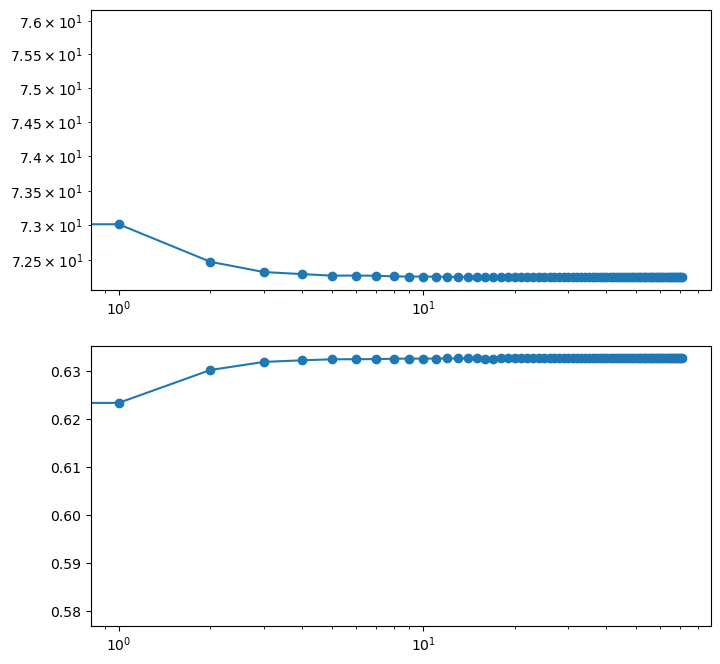

In [115]:
# Train Dataset SVT
X_train_prev = X_train
X_train = SVT(X_train_prev,show=True)

In [116]:
print(f"Number of NaN for variable \"age\": {(X_train_prev['age'].isnull()).sum()}")
print(f"Values for \"age\" previous to SVT: {(X_train_prev['age'] == 65).sum()}")
print(f"Values for \"age\" posterior to SVT: {(X_train['age'] == 65).sum()}")

Number of NaN for variable "age": 0
Values for "age" previous to SVT: 748
Values for "age" posterior to SVT: 748


In [117]:
# Test Dataset SVT
print(f"Number of NaN for variable \"age\": {(X_test['age'].isnull()).sum()}")
print(f"Values for \"age\" previous to SVT: {(X_test['age'] == 65).sum()}")

X_test = SVT(X_test,show=False)

print(f"Values for \"age\" posterior to SVT: {(X_test['age'] == 65).sum()}")

Number of NaN for variable "age": 0
Values for "age" previous to SVT: 177
Values for "age" posterior to SVT: 177


The transformation applied on the training set of the data should be the same applied to the test set

### Question 4

When the entire data set is used to impute missing values and handle categorical variables, information from the entire data set, including the test set, is essentially incorporated into the model training process. This can lead to data leakage, where the information from the test set affects the performance of the model, making the evaluation metrics overly optimistic and unreliable for real-world predictions.
Also Using the entire dataset to train the imputer and handle categorical variables would seem like a simple solution, but it is a bad idea because it introduces a strong risk of overfitting. Overfitting occurs when the model learns the training data too well, including noise and random variation.
This could lead to a poor ability of the model to generalize over new data, such as those in the test set. In addition, if new categories appear in the test set, the model will be unable to handle them properly because it never saw these categories during training. This could lead to incorrect predictions and compromise the reliability of your model.

## Block 3: Random Forest

In [118]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30732 entries, 0 to 30731
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  30732 non-null  int64  
 1   barthel              30732 non-null  float64
 2   charlson             30732 non-null  float64
 3   codidiagingreso      30732 non-null  float64
 4   codservicioreal      30732 non-null  float64
 5   creatinina           30732 non-null  float64
 6   drg                  30732 non-null  float64
 7   estancias            30732 non-null  float64
 8   glucosa              30732 non-null  float64
 9   hematocrito          30732 non-null  float64
 10  leucocitos           30732 non-null  float64
 11  metastatic_tumor     30732 non-null  float64
 12  num_grupoact3_HOSP   30732 non-null  float64
 13  numurgenciasprevias  30732 non-null  float64
 14  potasio              30732 non-null  float64
 15  proteina_c_reactiva  30732 non-null 

In [119]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7684 entries, 0 to 7683
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7684 non-null   int64  
 1   barthel              7684 non-null   float64
 2   charlson             7684 non-null   float64
 3   codidiagingreso      7684 non-null   float64
 4   codservicioreal      7684 non-null   float64
 5   creatinina           7684 non-null   float64
 6   drg                  7684 non-null   float64
 7   estancias            7684 non-null   float64
 8   glucosa              7684 non-null   float64
 9   hematocrito          7684 non-null   float64
 10  leucocitos           7684 non-null   float64
 11  metastatic_tumor     7684 non-null   float64
 12  num_grupoact3_HOSP   7684 non-null   float64
 13  numurgenciasprevias  7684 non-null   float64
 14  potasio              7684 non-null   float64
 15  proteina_c_reactiva  7684 non-null   f

In [120]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

print("Default parameters of RandomForestClassifier:")
print(rf_classifier.get_params())

Default parameters of RandomForestClassifier:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [121]:
probabilities = rf_classifier.predict_proba(X_test)

positive_class_probabilities = probabilities[:, 1]

print(positive_class_probabilities)

[0.34 0.42 0.3  ... 0.42 0.41 0.3 ]


In [122]:
positive_probs = rf_classifier.predict_proba(X_test)[:, 1]


auc_roc = roc_auc_score(y_test, positive_probs)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.5076920203953275


The AUC-ROC score (Area Under the Receiver Operating Characteristic Curve) is a numerical measure of the area under the ROC curve. This value represents the ability of a classification model to distinguish between positive and negative classes. In other words, the AUC-ROC score quantifies how well the model is able to separate positive and negative instances without being affected by the specific choice of classification threshold.

The AUC-ROC score is particularly useful when comparing binary classification models and wanting an overall assessment of their performance without having to choose a specific decision threshold. A higher AUC-ROC value generally indicates a better model in distinguishing between positive and negative classes.

AUC-ROC = 1: Indicates a perfect model that is able to distinguish perfectly between positive and negative classes while AUC-ROC < 0.5: Indicates that the model is performing worse than a random case.

In [123]:
predictions = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, predictions)

true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Accuracy: 0.6494013534617387
Sensitivity (True Positive Rate): 0.011235955056179775
Specificity (True Negative Rate): 0.9892301555644196


1) Sensitivity measures the proportion of true positives (correctly classified positive instances) to the total number of true positive instances in the dataset. In other words, it indicates the model's ability to correctly identify instances of the positive class.<br>
Sensitivity (TPR) =  =𝑇𝑃𝑇𝑃+𝐹𝑁 ​ <br>
Sensitivity is important when the cost of a false negative (a negative prediction for an actually positive instance) is high, for example, in a diagnostic test where missing a positive condition is serious.

2) Specificity measures the proportion of true negatives (correctly classified negative instances) to the total number of true negative instances in the dataset. It indicates the model's ability to correctly identify instances of the negative class. <br>
Specificity (TNR) =  =𝑇𝑁𝑇𝐹+𝐹𝑃 <br>
Specificity is important when the cost of a false positive (a positive prediction for an actually negative instance) is high, for example, in a test to identify dangerous behavior or safety situations.

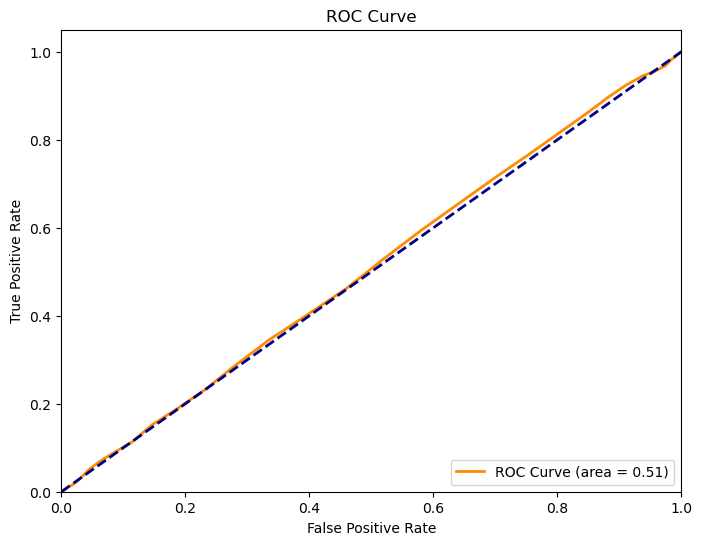

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, positive_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

This code is used to visualize the ROC curve (Receiver Operating Characteristic curve) and calculate the AUC-ROC score for a binary classification model.

First the true positive and false positive rates are calculated for the classes predicted by the model, and then these quantities are used to calculate the Area Under the Curve (AUC) using false positive rates (fpr) and true positive rates (tpr).

## Block 3 (Optional)

### Gradient Boosting

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [126]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
print("Default parameters of Gradient Boosting:")
print(gb_clf.get_params())

Default parameters of Gradient Boosting:
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [127]:
positive_probs = gb_clf.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, positive_probs)
print("AUC-ROC Score:", auc_roc)

/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 20 features, but GradientBoostingClassifier is expecting 7940 features as input.

In [ ]:
predictions = gb_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)

true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

In [ ]:
predictions = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of model: {accuracy}')


precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

class_names = ["Negative", "Positive"]
print(classification_report(y_test, predictions, target_names=class_names))

In [ ]:
probabilities = gb_clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### SVM

In [128]:
from sklearn.svm import SVC

svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)

print("Default parameters of SVM Classifier:")
print(svm_classifier.get_params())

In [ ]:
positive_probs = svm_classifier.predict_proba(X_test)[:, 1]


auc_roc = roc_auc_score(y_test, positive_probs)
print("AUC-ROC Score:", auc_roc)

In [ ]:
predictions = svm_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test_encoded, predictions)

true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

In [ ]:
predictions = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of model: {accuracy}')


precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

class_names = ["Negative", "Positive"]
print(classification_report(y_test, predictions, target_names=class_names))

In [ ]:
probabilities = svm_classifier.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Results

In [ ]:
res = {
    'Models': ['Random Forest', 'Gradient Boosting', 'Support Vector Machine'],
    'Accuracy': [0.719, 0.717, 0.728],
    'AUC-ROC-Score': [0.744, 0.750, 0.725],

}


results = pd.DataFrame(res)
display(HTML(results.to_html(index=False)))